In [7]:
import pandas as pd
import numpy as np
import scipy.stats as st 
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
hr = pd.read_csv('HR.csv')

1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

In [21]:
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [22]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [23]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

Расчет базовых статистик для количественных данных:

In [24]:
hr[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company']].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [25]:
#Расчет моды для количественных данных:
hr[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company']].mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.1,0.55,4.0,135,3.0
1,NaN,NaN,NaN,156,NaN


Расчет базовых статистик для категориальных данных:

In [26]:
def category_count(hr):
    
    list_index = ['Work_accident', 'left', 'promotion_last_5years', 'department', 'salary']
    list_columns = ['mode', 'count', 'percentage']
    list_tuple = [(index_, unique) for index_ in list_index for unique in hr[index_].unique()]
    index_multi = pd.MultiIndex.from_tuples(list_tuple, names=['columns', 'unique'])
    category_hr = pd.DataFrame(index=index_multi, columns=list_columns) 
    
    for i in category_hr.index:
        for columns in list_index:
            for mode in hr[columns].mode():
                if i[0] == columns and i[1] == mode:
                    category_hr.loc[i, 'mode'] = True
                elif category_hr.loc[i, 'mode'] != True:
                    category_hr.loc[i, 'mode'] = False
            for count in hr[columns].value_counts().index:
                if i[0] == columns and count == i[1]:
                    category_hr.loc[i, 'count'] = hr[columns].value_counts()[count]
                    category_hr.loc[i, 'percentage'] = round(hr[columns].value_counts(normalize=True)[count], 2)

    return category_hr

In [27]:
category_count(hr)

mode  count percentage
columns               unique                              
Work_accident         0             True  12830       0.86
                      1            False   2169       0.14
left                  1            False   3571       0.24
                      0             True  11428       0.76
promotion_last_5years 0             True  14680       0.98
                      1            False    319       0.02
department            sales         True   4140       0.28
                      accounting   False    767       0.05
                      hr           False    739       0.05
                      technical    False   2720       0.18
                      support      False   2229       0.15
                      management   False    630       0.04
                      IT           False   1227       0.08
                      product_mng  False    902       0.06
                      marketing    False    858       0.06
                      RandD        False    787       0.05
salary                low           True   7316       0.49
                      medium       False   6446       0.43
                      high         False   1237       0.08

Расчет и визуализация корреляционной матрицы:

In [28]:
hr_corr = hr[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company']]
hr_corr.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


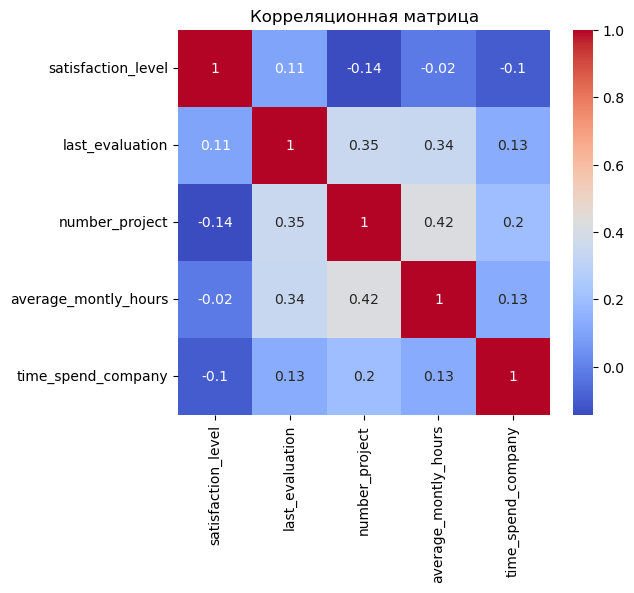

In [29]:
plt.figure(figsize=(6, 5))
sns.heatmap(hr_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

In [30]:
def min_max(data):
    df = data
    max_ = 0
    min_ = 1
    x_max = None
    y_max = None
    x_min = None
    y_min = None

    for x in df.columns:
        for y in df.index:
            if np.abs(df.loc[df[x] < 1, x]).max() == np.abs(df.loc[y, x]):
                if np.abs(df.loc[y, x]) > np.abs(max_):
                    max_ = df.loc[y, x]
                    x_max = x
                    y_max = y
            elif np.abs(df.loc[df[x] < 1 , x]).min() == np.abs(df.loc[y, x]):
                if np.abs(df.loc[y, x]) < np.abs(min_):
                    min_ = df.loc[y, x]
                    x_min = x
                    y_min = y
    print(f"Самые скоррелированные переменные - {x_max} и {y_max}\nКоэфициент корреляциит- {round(max_, 3)}\nНаименее скоррелированные переменные - {x_min} и {y_min}\nКоэфициент корреляциит- {round(min_, 3)}")
    return max_, min_, x_max, y_max, x_min, y_min

In [31]:
min_max(hr_corr.corr())

Самые скоррелированные переменные - number_project и average_montly_hours
Коэфициент корреляциит- 0.417
Наименее скоррелированные переменные - satisfaction_level и average_montly_hours
Коэфициент корреляциит- -0.02


(0.41721063440177986,
 -0.020048113219472644,
 'number_project',
 'average_montly_hours',
 'satisfaction_level',
 'average_montly_hours')

Расчет количества работающих сотрудников в каждом департаменте:

In [32]:
hr.loc[hr['left'] == 0]['department'].value_counts()

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: department, dtype: int64

Так как имеем дело с категориальными данным, то визуализация распределения сотрудников позарплатам можно изобоазить при помощи столбчатой диаграммы 

Text(0.5, 1.0, 'Распределение сотрудников по зарплатам')

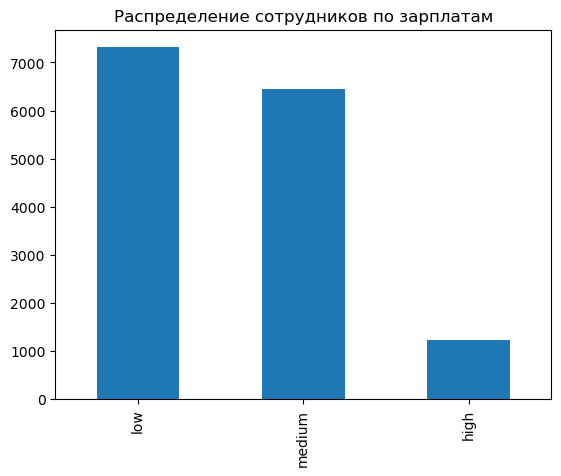

In [33]:
hr['salary'].value_counts().plot(kind='bar')
plt.title('Распределение сотрудников по зарплатам')

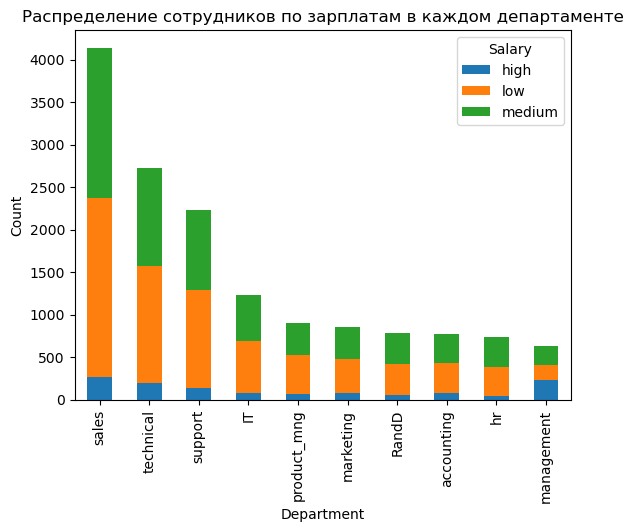

In [34]:
group = hr.groupby(['department', 'salary']).size().unstack()
sort_departments = group.sum(axis=1).sort_values(ascending=False).index
group_sort = group.loc[sort_departments]
group_sort.plot(kind='bar', stacked=True)
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Распределение сотрудников по зарплатам в каждом департаменте')
plt.legend(title='Salary')
plt.show()

Проверим гипотезу, что сотрудники с высоким окладом 
проводят на работе больше времени, чем сотрудники с низким
окладом:   

H0 - cотрудники с высоким окладом 
проводят на работе столько же времени, сколько и сотрудники с низким
окладом.   
H1 - сотрудники с высоким окладом 
проводят на работе больше времени, чем сотрудники с низким
окладом.

In [35]:
low_salary = hr.loc[hr['salary'] == 'low']['average_montly_hours']
low_salary.describe()

count    7316.000000
mean      200.996583
std        50.832214
min        96.000000
25%       155.000000
50%       199.000000
75%       246.000000
max       310.000000
Name: average_montly_hours, dtype: float64

In [36]:
high_salary = hr.loc[hr['salary'] == 'high']['average_montly_hours']
high_salary.describe()

count    1237.000000
mean      199.867421
std        47.710446
min        96.000000
25%       161.000000
50%       199.000000
75%       241.000000
max       307.000000
Name: average_montly_hours, dtype: float64

Text(0.5, 1.0, 'Сравнение распределений среднего количества часов на рабочем месте в месяц')

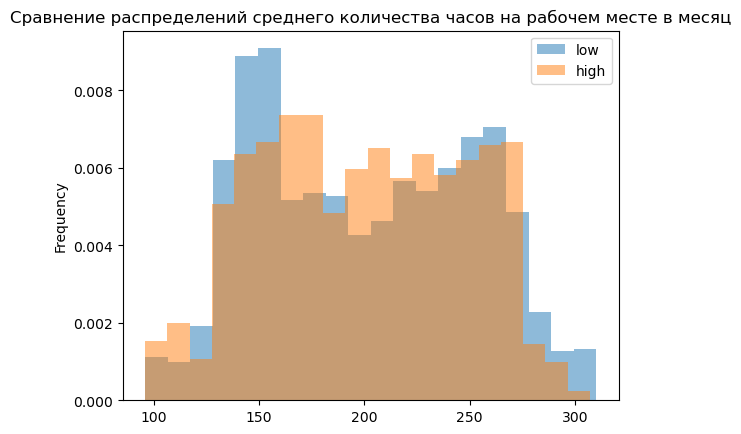

In [37]:
low_salary.plot(kind='hist', 
                     alpha = 0.5,
                     bins=20,
                     density = True,
                     label='low')

high_salary.plot(kind='hist', 
                     alpha = 0.5,
                     bins=20,
                     density = True,
                     label='high')
plt.legend(loc='upper right')
plt.title('Сравнение распределений среднего количества часов на рабочем месте в месяц')

Text(0, 0.5, 'Часы')

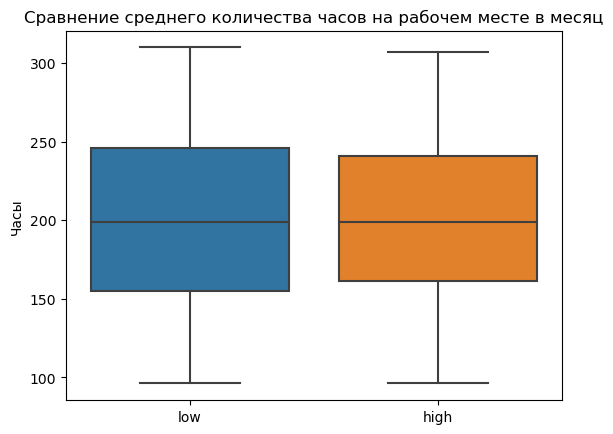

In [38]:
salary_time = pd.DataFrame({
    'low' : low_salary,
    'high' : high_salary
})
sns.boxplot(data=salary_time)
plt.title('Сравнение среднего количества часов на рабочем месте в месяц')
plt.ylabel('Часы')

Так как распределение явно не является нормальным и осутвуют выбросы можно использовать непараметрический тест Манна-Уитни.

In [39]:
stat, p_value = st.mannwhitneyu(low_salary, high_salary)

print(f"Статистика = {stat:.5f}, p-value = {p_value:.5f}")

if p_value > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые.')
    print()
    print('Вывод:')
    print('Сотрудники с высоким окладом проводят на работе столько же времени, сколько и сотрудники с низким окладом.')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются.')
    print()
    print('Вывод:')
    print('Сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.')

Статистика = 4542795.50000, p-value = 0.82413
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые.

Вывод:
Сотрудники с высоким окладом проводят на работе столько же времени, сколько и сотрудники с низким окладом.


Показатели среди уволившихся и не уволившихся сотрудников:

In [40]:
hr.loc[]

SyntaxError: invalid syntax (4125868638.py, line 1)

In [ ]:
def category_count(hr):
    
    list_index = ['Work_accident', 'left', 'promotion_last_5years', 'department', 'salary']
    list_columns = ['mode', 'count', 'percentage']
    list_tuple = [(index_, unique) for index_ in list_index for unique in hr[index_].unique()]
    index_multi = pd.MultiIndex.from_tuples(list_tuple, names=['columns', 'unique'])
    category_hr = pd.DataFrame(index=index_multi, columns=list_columns) 
    
    for i in category_hr.index:
        for columns in list_index:
            for mode in hr[columns].mode():
                if i[0] == columns and i[1] == mode:
                    category_hr.loc[i, 'mode'] = True
                elif category_hr.loc[i, 'mode'] != True:
                    category_hr.loc[i, 'mode'] = False
            for count in hr[columns].value_counts().index:
                if i[0] == columns and count == i[1]:
                    category_hr.loc[i, 'count'] = hr[columns].value_counts()[count]
                    category_hr.loc[i, 'percentage'] = round(hr[columns].value_counts(normalize=True)[count], 2)

    return category_hr